# **`TRAFFIC SIGN RECOGNITION AND DETECTION`**



---



#IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import load_model
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
#from google.colab import files
#import pickle
#import cv2



/tmp/ipykernel_3722/1912992035.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-01 10:59:12.638576: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 10:59:12.638649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 10:59:12.687438: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable t

-----------------------------------------------------------------------------------------------------

# Configuring Kaggle API

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                         title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                                  Jobs and Salaries in Data Science                76KB  2023-12-25 20:03:32          10664        205  1.0              
nelgiriyewithana/apple-quality                              Apple Quality                                   170KB  2024-01-11 14:31:07           4086        100  1.0              
joebeachcapital/57651-spotify-songs                         57,650 Spotify Songs                             21MB  2024-01-23 06:48:36            972         32  1.0              
sahilwagh/gold-stock-prices                                 Gold Stock Prices                       

--------------------------------------------------------------------------------------------------

# Downloading Dataset

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 99% 606M/612M [00:06<00:00, 80.3MB/s]
100% 612M/612M [00:06<00:00, 97.7MB/s]


In [ ]:
!mkdir Dataset
!unzip -q gtsrb-german-traffic-sign.zip -d /content/Dataset



------------------------------------------------------


# PRE-PROCESSING

###Loading and Resizing of Images

In [ ]:

images = []
labels = []
classes = 43
for i in range(classes):
    path = './content/Dataset/train/' + str(i)
    raw_images = os.listdir(path)
    for img in raw_images:
        try:
            image = np.array(Image.open(path + '/' + img).resize((50, 50)))
            images.append(image)
            labels.append(i)
        except Exception as e:
            print(e)


### Converting images and labels to array

In [ ]:
images = np.array(images)
labels = np.array(labels)


In [ ]:
classes = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}
print('Shape of Image Data: ' + str(images.shape))
print('Shape of Label Data: ' + str(labels.shape))


Shape of Image Data: (39209, 50, 50, 3)
Shape of Label Data: (39209,)


-------------------------------------------------------------------------------------------------------------------

# Train-Test Split

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42, shuffle=True)

print("Shape of Training Images: " + str(x_train.shape))
print("Shape of Validation Images: " + str(x_test.shape))
print("Shape of Training Labels: " + str(y_train.shape))
print("Shape of Validation Labels: " + str(y_test.shape))


Shape of Training Images: (29406, 50, 50, 3)
Shape of Validation Images: (9803, 50, 50, 3)
Shape of Training Labels: (29406,)
Shape of Validation Labels: (9803,)


### One-Hot Encoding

In [ ]:

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


--------------------------------------------------------------------------------------------

#CNN with Custom Architecture (Model 1)

### Training

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(8, 8), activation='relu', input_shape=(50, 50, 3)))
model.add(Conv2D(filters=32, kernel_size=(8, 8), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))

model.add(Dropout(rate=0.5))

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(4, 4), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))

model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dense(43, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 43, 43, 16)        3088      
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 32)        32800     
                                                                 
 max_pooling2d (MaxPooling2  (None, 18, 18, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 18, 18, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 18, 18, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        3

2024-02-01 10:59:37.978785: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-01 10:59:38.083929: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

###Optimization (to minimise loss function)

In [ ]:

opt = Adam(learning_rate=0.001)


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

--------------------------------------------------------------------------------------------

# FITTING

In [ ]:
epochs = 20
batch_size = 32
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test))

Epoch 1/20
919/919 [==============================] - 125s 135ms/step - loss: 0.6299 - accuracy: 0.8383 - val_loss: 0.1612 - val_accuracy: 0.9591
Epoch 2/20
919/919 [==============================] - 116s 126ms/step - loss: 0.1525 - accuracy: 0.9572 - val_loss: 0.0873 - val_accuracy: 0.9819
Epoch 3/20
919/919 [==============================] - 114s 124ms/step - loss: 0.0924 - accuracy: 0.9737 - val_loss: 0.0887 - val_accuracy: 0.9792
Epoch 4/20
919/919 [==============================] - 116s 126ms/step - loss: 0.0649 - accuracy: 0.9812 - val_loss: 0.1567 - val_accuracy: 0.9601
Epoch 5/20
919/919 [==============================] - 117s 127ms/step - loss: 0.0679 - accuracy: 0.9817 - val_loss: 0.1822 - val_accuracy: 0.9765
Epoch 6/20
919/919 [==============================] - 115s 125ms/step - loss: 0.0841 - accuracy: 0.9766 - val_loss: 0.0561 - val_accuracy: 0.9892
Epoch 7/20
919/919 [==============================] - 114s 124ms/step - loss: 0.0587 - accuracy: 0.9841 - val_loss: 0.0523 -

--------------------------------------------------------------------------------------------

# ACCURACY & LOSS OVER EPOCHS - GRAPHS

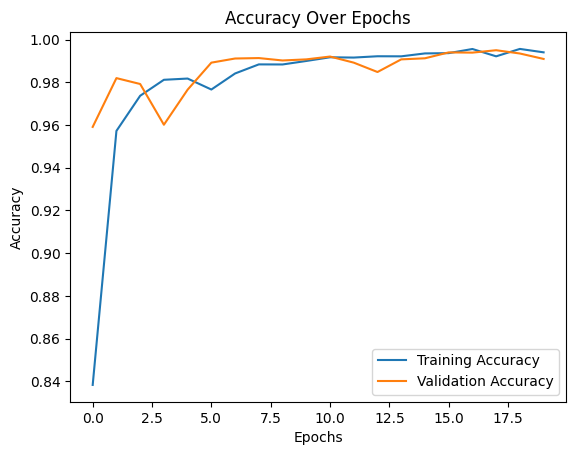

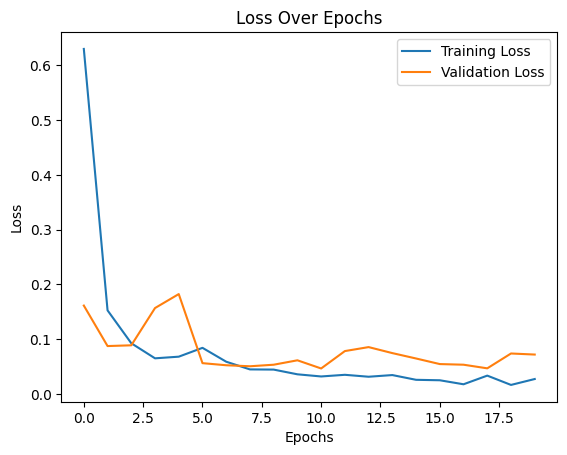

In [ ]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




---



# ACCURACY OF MODEL ON TESTING DATA

### Importing Test Dataset

In [ ]:
y_test = pd.read_csv('./content/Dataset/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

In [ ]:
np.save('./content/Dataset/labels.npy', labels)
np.save('./content/Dataset/imgs.npy', imgs)


### Loading images

In [ ]:
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('./content/Dataset/'+img)
        image = image.resize([50, 50])
        data.append(np.array(image))

X_test = np.array(data)
np.save('./content/X_test.npy', X_test)

### Accuracy of Test Data

In [ ]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

395/395 [==============================] - 6s 14ms/step


In [ ]:
np.save('pred.npy', pred)

In [ ]:
print('Accuracy: ' + str(accuracy_score(labels, pred)*100) + ' %')

Accuracy: 95.76405384006334 %


### Confusion Matrix, Heatmap

In [ ]:

cm = confusion_matrix(labels, pred)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
cm = np.loadtxt("confusion_matrix.csv", delimiter=",")


      0      1      2      3      4      5      6      7      8      9   ...  \
0   60.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0  709.0    5.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0  ...   
2    0.0    2.0  744.0    1.0    1.0    1.0    0.0    1.0    0.0    0.0  ...   
3    0.0    0.0    0.0  422.0    0.0   24.0    0.0    1.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0  651.0    3.0    0.0    2.0    0.0    0.0  ...   
5    0.0    0.0    6.0    0.0    1.0  613.0    0.0    7.0    0.0    0.0  ...   
6    0.0    1.0    1.0    0.0    0.0   24.0  121.0    0.0    0.0    0.0  ...   
7    0.0    0.0    0.0    0.0    2.0    6.0    0.0  440.0    1.0    0.0  ...   
8    0.0    0.0    0.0    0.0    3.0   17.0    0.0    1.0  412.0    0.0  ...   
9    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  458.0  ...   
10   0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0  ...   
11   0.0    0.0    0.0    0.0    0.0    

<Axes: >

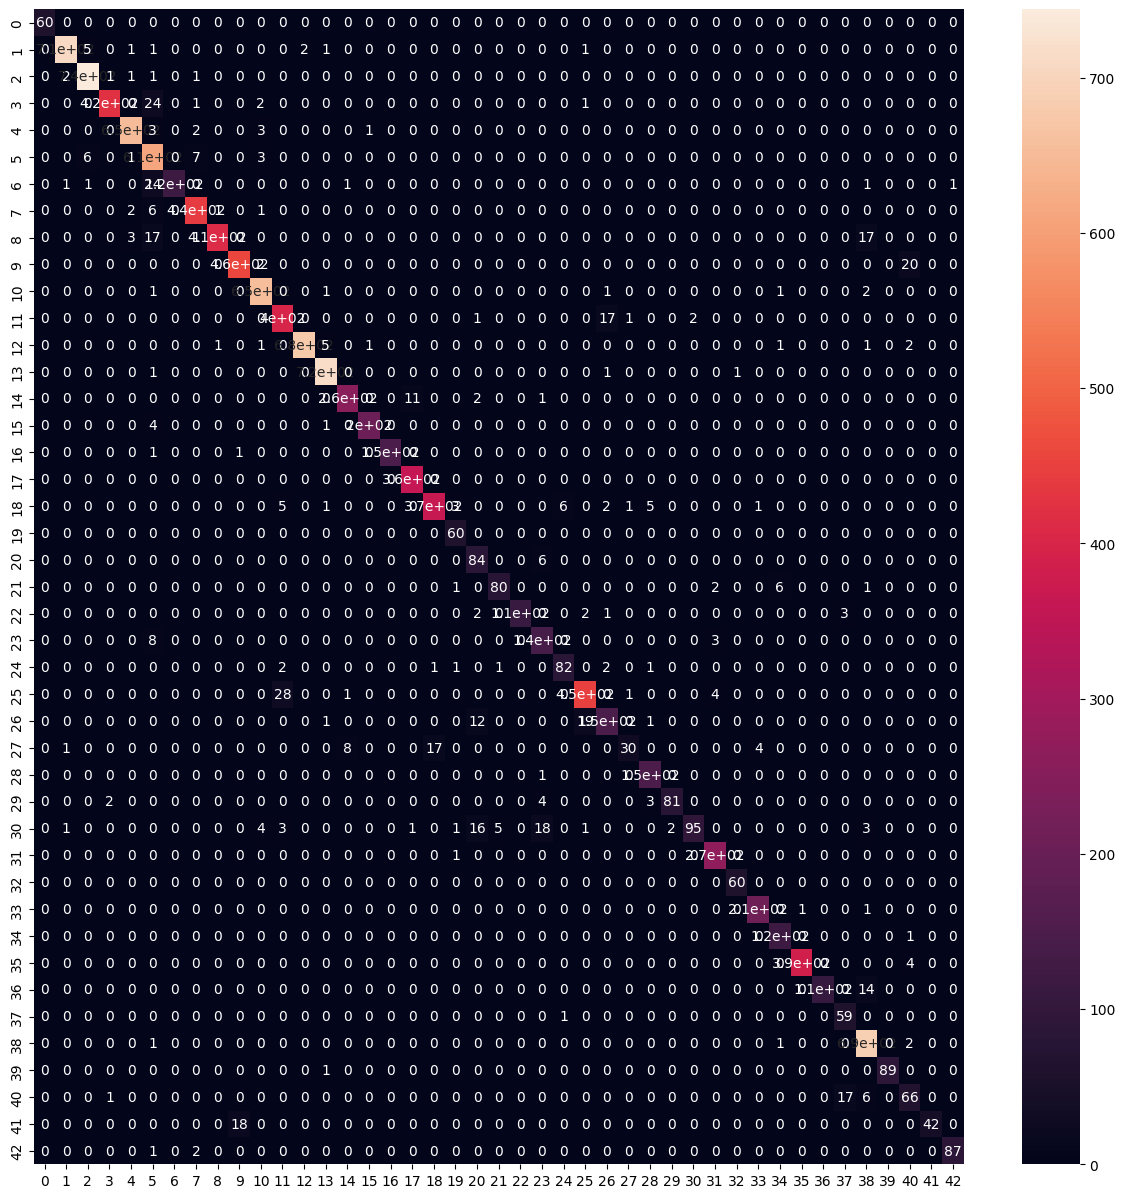

In [ ]:

df= pd.DataFrame(cm, index = classes,  columns = classes)
print(df)
plt.figure(figsize = (15,15))
sns.heatmap(df, annot=True)

#Saving Model

In [ ]:
model.save("./custom model/project.h5")

/home/aadithyan/Documents/Deep Learning Project/dlp/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




---



# CNN with SEQUENTIAL Architecture (Model 2)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(8, 8), activation='relu', input_shape=(50, 50, 3)))
model.add(Conv2D(filters=32, kernel_size=(8, 8), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(rate=0.5))

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(4, 4), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 43, 43, 16)        3088      
                                                                 
 conv2d_5 (Conv2D)           (None, 36, 36, 32)        32800     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 18, 18, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 18, 18, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)       

### Compile

In [ ]:
opt = Adam(learning_rate=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### Fitting

In [ ]:
epochs = 20
batch_size = 32
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test))

Epoch 1/20
919/919 [==============================] - ETA: 0s - loss: 0.6072 - accuracy: 0.8451

ValueError: Data cardinality is ambiguous:
  x sizes: 9803
  y sizes: 12630
Make sure all arrays contain the same number of samples.

### Evaluation

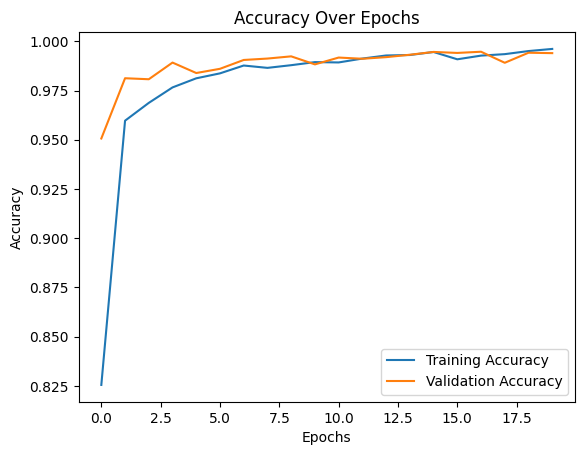

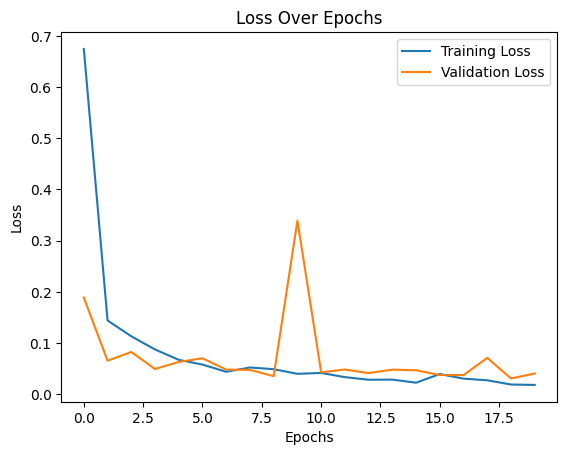

In [ ]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Testing accuracy on Test Data

In [ ]:
y_test = pd.read_csv('./content/Dataset/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

In [ ]:
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('./content/Dataset/'+img)
        image = image.resize([50, 50])
        data.append(np.array(image))

X_test = np.array(data)
np.save('./content/X_test.npy', X_test)

In [ ]:

with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)


np.save('pred.npy', pred)

print('Accuracy: ' + str(accuracy_score(labels, pred)*100) + ' %')

395/395 [==============================] - 47s 117ms/step
Accuracy: 96.57165479018211 %


### Confusion matrix, Heatmap

In [ ]:
cm = confusion_matrix(labels, pred)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
cm = np.loadtxt("confusion_matrix.csv", delimiter=",")

      0      1      2      3      4      5      6      7      8      9   ...  \
0   58.0    0.0    0.0    0.0    2.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0  702.0   12.0    0.0    0.0    2.0    0.0    1.0    0.0    0.0  ...   
2    0.0    1.0  741.0    4.0    0.0    3.0    0.0    0.0    0.0    0.0  ...   
3    0.0    1.0    1.0  438.0    0.0    6.0    0.0    1.0    0.0    0.0  ...   
4    0.0    4.0    3.0    0.0  637.0    3.0    1.0    5.0    0.0    0.0  ...   
5    0.0    1.0    5.0    0.0    0.0  619.0    0.0    2.0    0.0    0.0  ...   
6    0.0    6.0    1.0    0.0    0.0    0.0  129.0    0.0    0.0    0.0  ...   
7    0.0    0.0    0.0    0.0    0.0    6.0    0.0  443.0    1.0    0.0  ...   
8    0.0    1.0    1.0    0.0    3.0    2.0    0.0    5.0  427.0    9.0  ...   
9    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  477.0  ...   
10   0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0  ...   
11   0.0    0.0    0.0    0.0    0.0    

<Axes: >

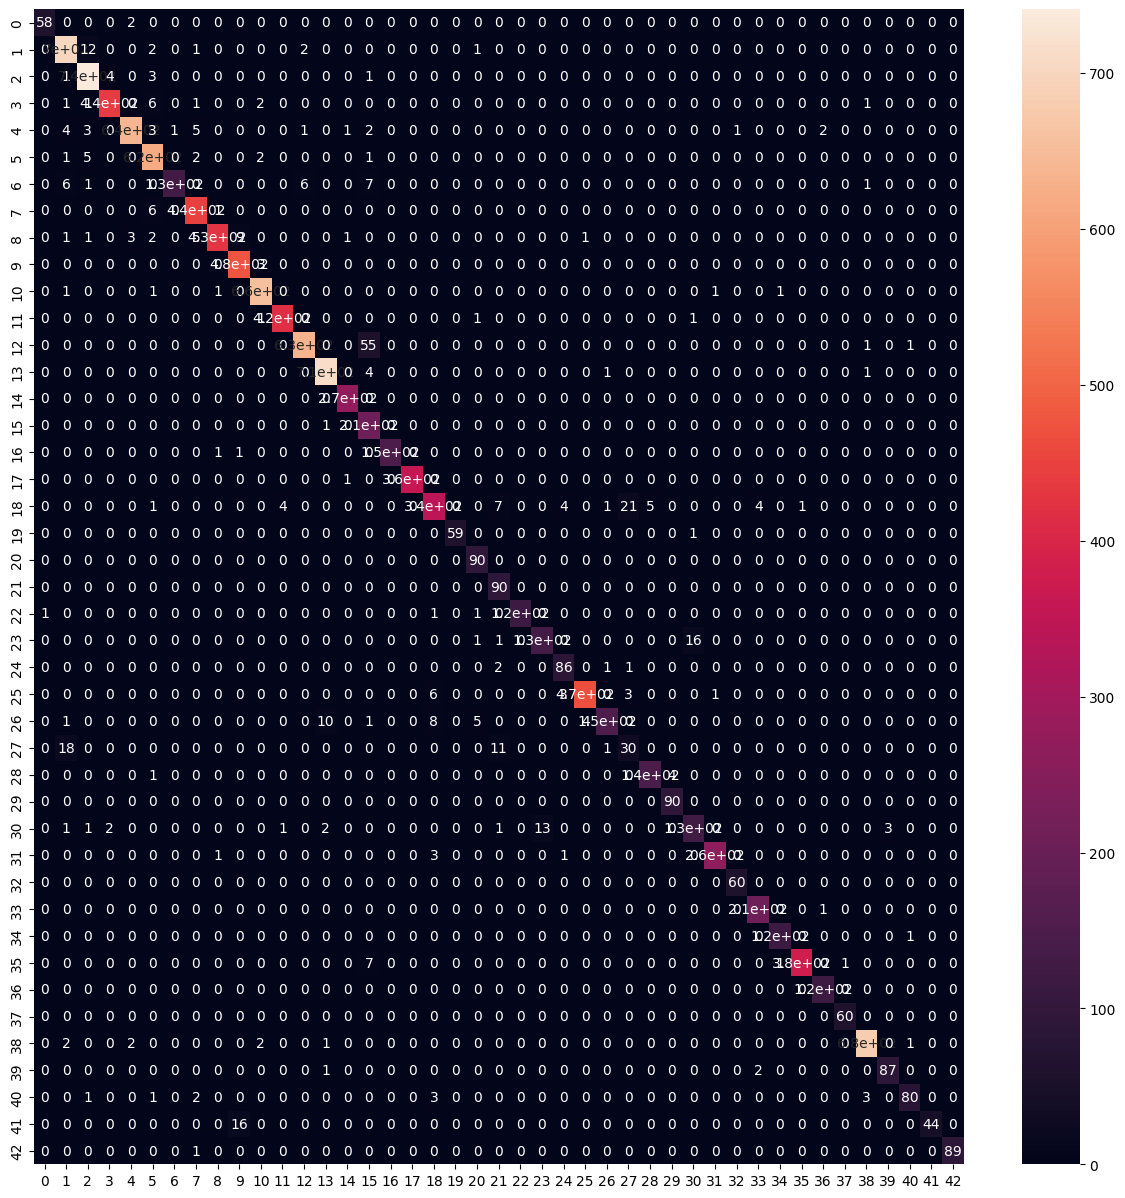

In [ ]:


df= pd.DataFrame(cm, index = classes,  columns = classes)
print(df)
plt.figure(figsize = (15,15))
sns.heatmap(df, annot=True)


In [ ]:

model.save("./seq model/project.h5")



---



# VGG (Model 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 19, 19, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 9, 9, 128)         0         
 g2D)                                                 

### Compile

In [ ]:
opt = Adam(learning_rate=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### Fitting

In [ ]:
epochs = 20
batch_size = 32
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test))

Epoch 1/20
919/919 [==============================] - ETA: 0s - loss: 0.8136 - accuracy: 0.8359

ValueError: Data cardinality is ambiguous:
  x sizes: 9803
  y sizes: 12630
Make sure all arrays contain the same number of samples.

### Evaluation

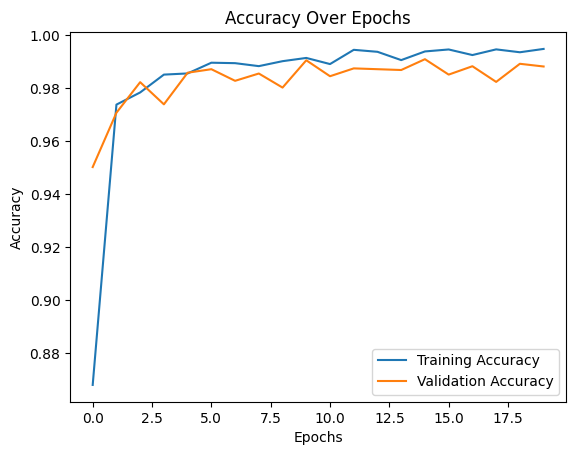

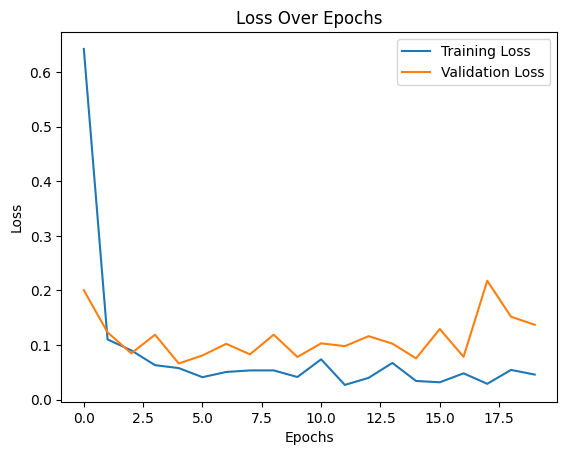

In [ ]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Testing model accuracy on Test Data


In [ ]:
y_test = pd.read_csv('./content/Dataset/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

395/395 [==============================] - 92s 231ms/step
Accuracy: 94.9089469517023 %
      0      1      2      3      4      5      6      7      8      9   ...  \
0   58.0    0.0    0.0    0.0    2.0    0.0    0.0    0.0    0.0    0.0  ...   
1    1.0  699.0    3.0    0.0    4.0    5.0    0.0    2.0    0.0    0.0  ...   
2    0.0    2.0  741.0    4.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    2.0  438.0    0.0    7.0    0.0    0.0    0.0    0.0  ...   
4    0.0    9.0    2.0    1.0  626.0    3.0    1.0    6.0    0.0    0.0  ...   
5    0.0    0.0   13.0   15.0    3.0  591.0    0.0    2.0    3.0    0.0  ...   
6    0.0    0.0    1.0    9.0    0.0    4.0  132.0    0.0    0.0    0.0  ...   
7    0.0    1.0    0.0    0.0    2.0    9.0    0.0  420.0   12.0    0.0  ...   
8    0.0    0.0    1.0    1.0    2.0    4.0    0.0    6.0  421.0    0.0  ...   
9    0.0    0.0    0.0    8.0    0.0    0.0    0.0    0.0    0.0  460.0  ...   
10   0.0    1.0    1.0    6.0    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


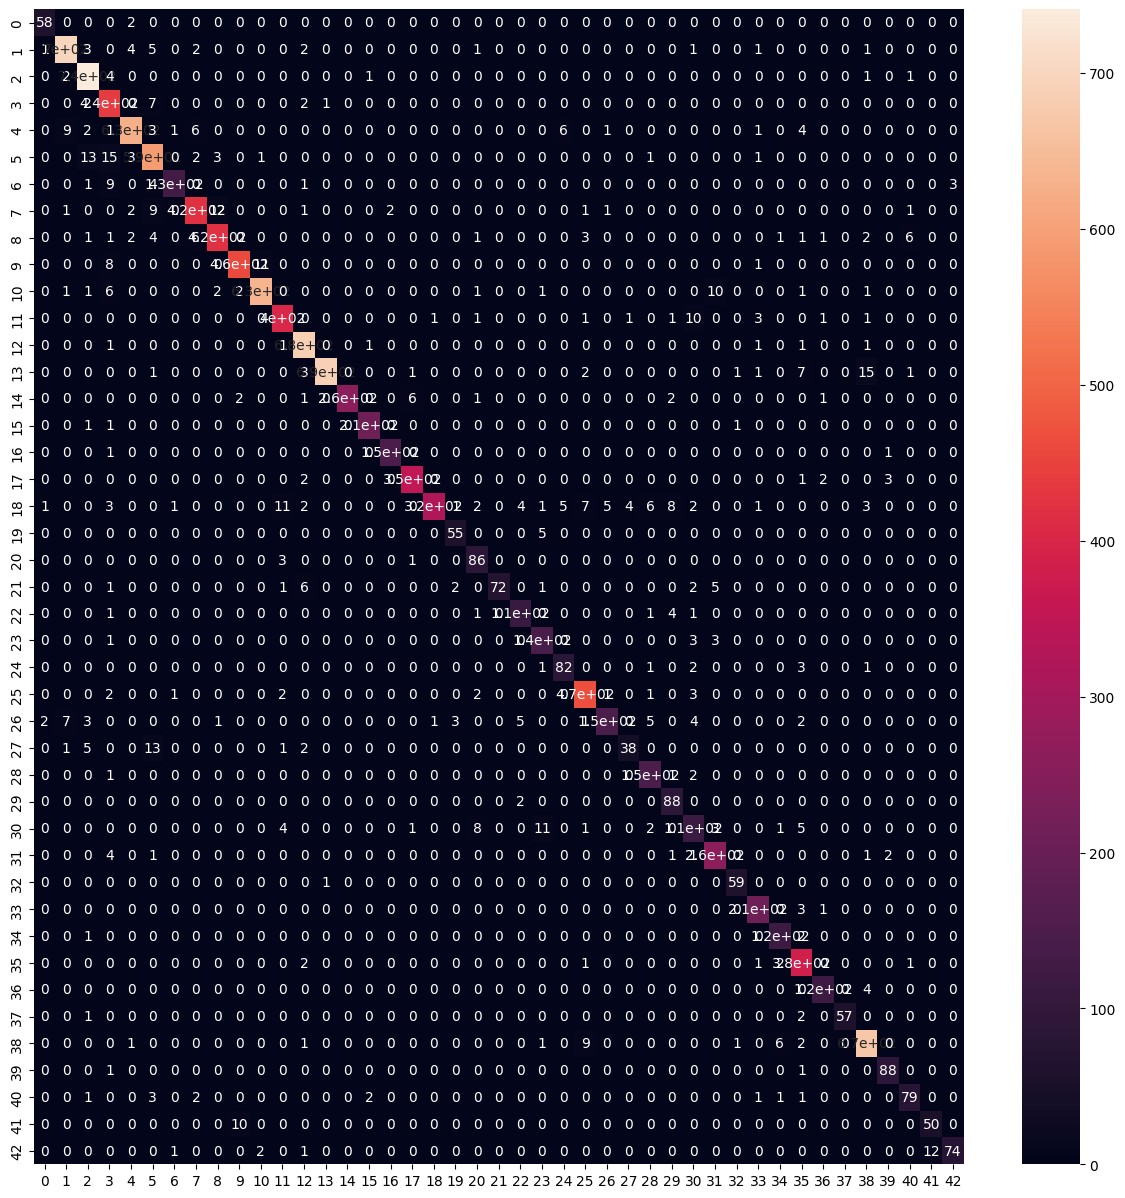

In [ ]:
np.save('./content/Dataset/labels.npy', labels)
np.save('./content/Dataset/imgs.npy', imgs)


#      Testing accuracy on Test Data
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('./content/Dataset/'+img)
        image = image.resize([50, 50])
        data.append(np.array(image))

X_test = np.array(data)
np.save('./content/X_test.npy', X_test)


with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)


np.save('pred.npy', pred)

print('Accuracy: ' + str(accuracy_score(labels, pred)*100) + ' %')

#       Confusion matrix & Heatmap
cm = confusion_matrix(labels, pred)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
cm = np.loadtxt("confusion_matrix.csv", delimiter=",")



df= pd.DataFrame(cm, index = classes,  columns = classes)
print(df)
plt.figure(figsize = (15,15))
sns.heatmap(df, annot=True)

### Saving Model

In [ ]:
model.save("./vgg model/project.h5")



---



# LeNet (Model 4)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(50, 50, 3)))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 46, 46, 6)         456       
                                                                 
 average_pooling2d_2 (Avera  (None, 23, 23, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_11 (Conv2D)          (None, 19, 19, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 9, 9, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_3 (Flatten)         (None, 1296)              0         
                                                                 
 dense_7 (Dense)             (None, 120)              

### Compile

In [ ]:
opt = Adam(learning_rate=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### Fitting

In [ ]:
epochs = 20
batch_size = 32
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test))

Epoch 1/20
919/919 [==============================] - 64s 68ms/step - loss: 1.0901 - accuracy: 0.7375 - val_loss: 0.3012 - val_accuracy: 0.9249
Epoch 2/20
919/919 [==============================] - 61s 66ms/step - loss: 0.2022 - accuracy: 0.9489 - val_loss: 0.1730 - val_accuracy: 0.9570
Epoch 3/20
919/919 [==============================] - 57s 63ms/step - loss: 0.1275 - accuracy: 0.9669 - val_loss: 0.2286 - val_accuracy: 0.9446
Epoch 4/20
919/919 [==============================] - 61s 66ms/step - loss: 0.0951 - accuracy: 0.9755 - val_loss: 0.1649 - val_accuracy: 0.9607
Epoch 5/20
919/919 [==============================] - 57s 62ms/step - loss: 0.0814 - accuracy: 0.9793 - val_loss: 0.1689 - val_accuracy: 0.9685
Epoch 6/20
919/919 [==============================] - 58s 63ms/step - loss: 0.0823 - accuracy: 0.9786 - val_loss: 0.1245 - val_accuracy: 0.9727
Epoch 7/20
919/919 [==============================] - 56s 61ms/step - loss: 0.0565 - accuracy: 0.9858 - val_loss: 0.1815 - val_accuracy:

### Evaluation

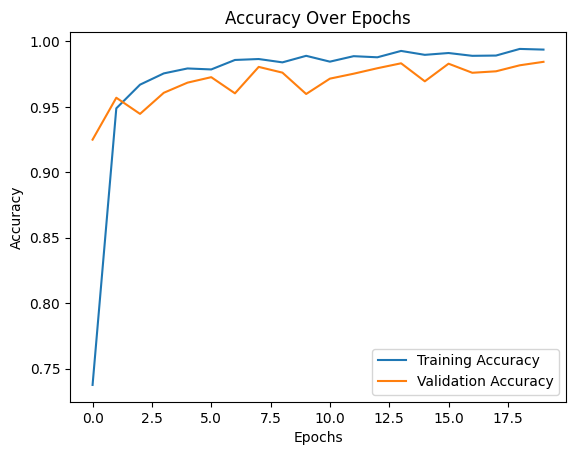

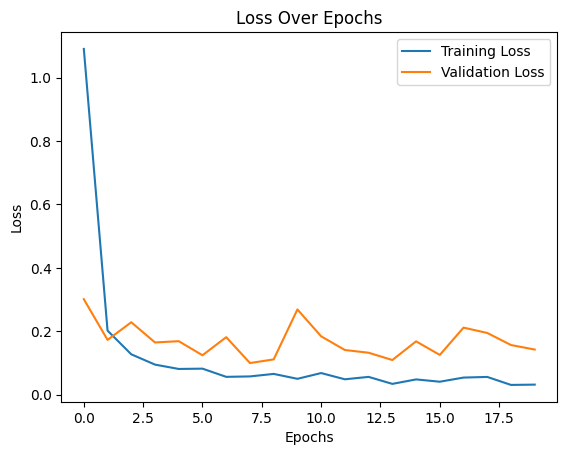

In [ ]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Testing model accuracy on Test data

In [ ]:
y_test = pd.read_csv('./content/Dataset/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

395/395 [==============================] - 8s 19ms/step
Accuracy: 93.64212193190815 %
      0      1      2      3      4      5      6      7      8      9   ...  \
0   55.0    1.0    0.0    0.0    3.0    0.0    0.0    0.0    1.0    0.0  ...   
1    4.0  694.0   12.0    0.0    2.0    0.0    1.0    1.0    1.0    0.0  ...   
2    0.0    4.0  729.0    6.0    1.0    6.0    0.0    0.0    1.0    1.0  ...   
3    0.0    0.0    3.0  424.0    0.0   18.0    0.0    1.0    1.0    0.0  ...   
4    2.0    9.0    6.0    2.0  618.0    8.0    0.0    4.0    3.0    0.0  ...   
5    0.0    1.0   24.0    9.0    1.0  589.0    0.0    2.0    1.0    0.0  ...   
6    0.0    1.0    1.0    1.0    0.0    7.0  138.0    0.0    0.0    0.0  ...   
7    0.0    1.0    2.0    2.0    1.0    7.0    0.0  396.0   22.0    2.0  ...   
8    0.0    0.0    2.0    3.0    1.0    2.0    0.0   11.0  424.0    2.0  ...   
9    0.0    0.0    0.0   11.0    0.0    0.0    0.0    0.0    0.0  464.0  ...   
10   0.0    0.0    0.0   18.0    0

<Axes: >

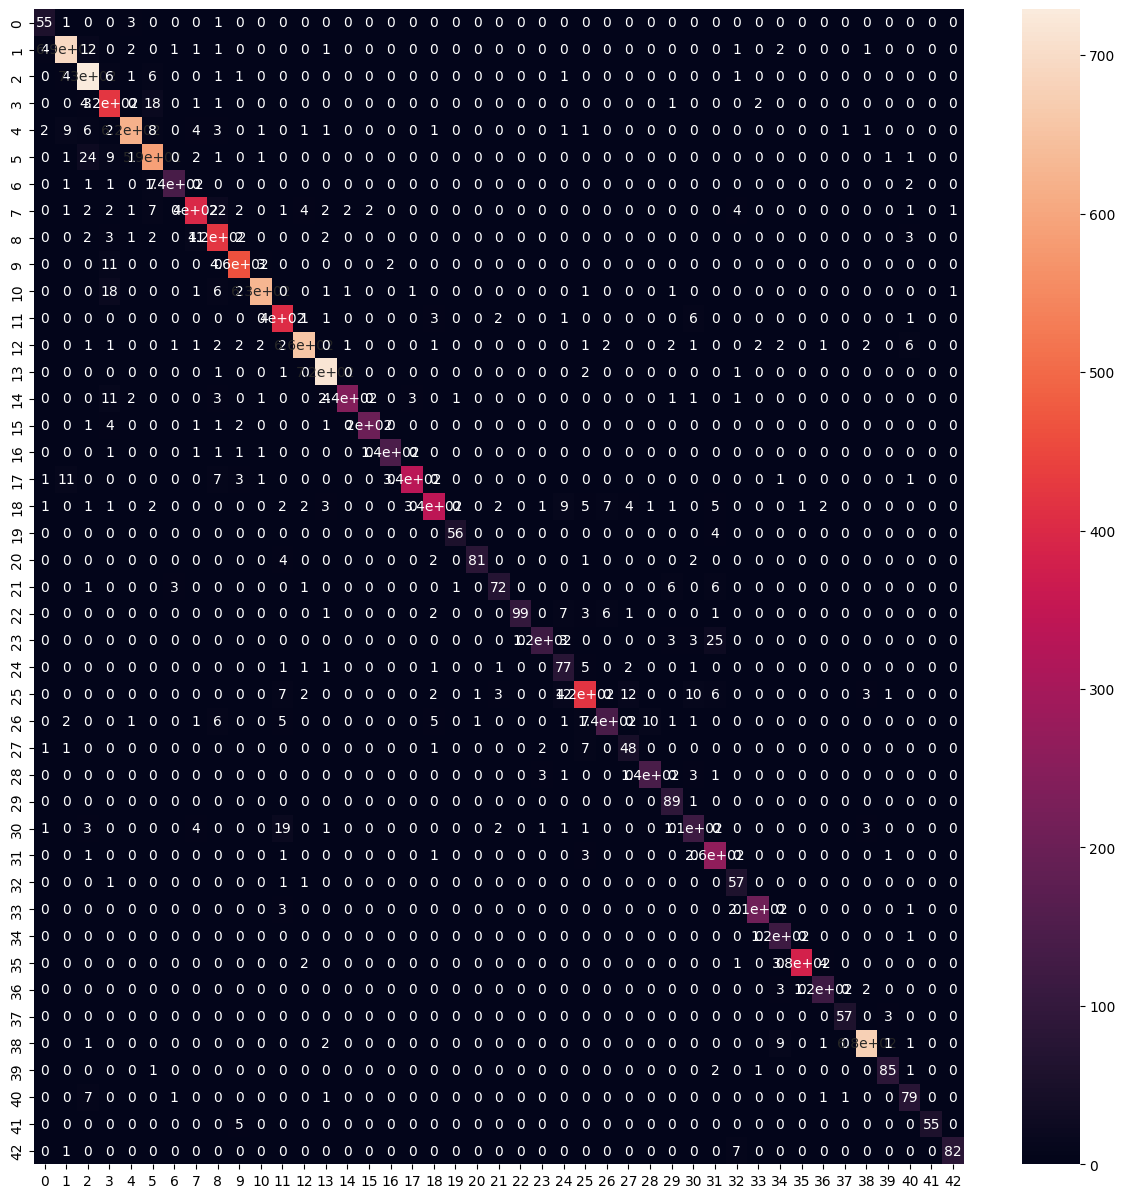

In [ ]:



#      Testing accuracy on Test Data
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('./content/Dataset/'+img)
        image = image.resize([50, 50])
        data.append(np.array(image))

X_test = np.array(data)
np.save('./content/X_test.npy', X_test)


with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)


np.save('pred.npy', pred)

print('Accuracy: ' + str(accuracy_score(labels, pred)*100) + ' %')

#       Confusion matrix & Heatmap
cm = confusion_matrix(labels, pred)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
cm = np.loadtxt("confusion_matrix.csv", delimiter=",")



df= pd.DataFrame(cm, index = classes,  columns = classes)
print(df)
plt.figure(figsize = (15,15))
sns.heatmap(df, annot=True)

### Saving Model

In [ ]:
model.save("./lenet model/project.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




---



#ResNet (Model 5)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam


model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


for _ in range(11):
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())


model.add(GlobalAveragePooling2D())


model.add(Dense(512, activation='relu'))
model.add(Dense(43, activation='softmax'))




model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_4 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_5 (Bat  (None, 24, 24, 32)       

In [ ]:

opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
epochs = 10
batch_size = 32
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test))

Epoch 1/10
919/919 [==============================] - 1233s 1s/step - loss: 2.3152 - accuracy: 0.3085 - val_loss: 3.0111 - val_accuracy: 0.3039
Epoch 2/10
919/919 [==============================] - 1201s 1s/step - loss: 0.8246 - accuracy: 0.7387 - val_loss: 0.8815 - val_accuracy: 0.7397
Epoch 3/10
919/919 [==============================] - 1142s 1s/step - loss: 0.3575 - accuracy: 0.8902 - val_loss: 0.3543 - val_accuracy: 0.8879
Epoch 4/10
919/919 [==============================] - 1204s 1s/step - loss: 0.1861 - accuracy: 0.9464 - val_loss: 0.5243 - val_accuracy: 0.8424
Epoch 5/10
919/919 [==============================] - 1203s 1s/step - loss: 0.1479 - accuracy: 0.9569 - val_loss: 0.1321 - val_accuracy: 0.9617
Epoch 6/10
919/919 [==============================] - 1137s 1s/step - loss: 0.1074 - accuracy: 0.9692 - val_loss: 0.1716 - val_accuracy: 0.9487
Epoch 7/10
919/919 [==============================] - 1193s 1s/step - loss: 0.0989 - accuracy: 0.9721 - val_loss: 0.2774 - val_accuracy:

### Evaluation

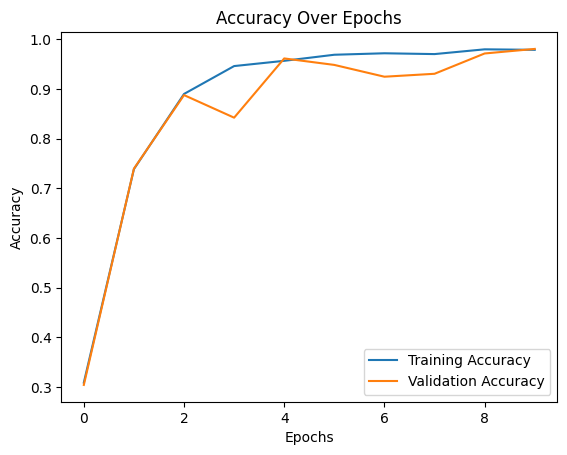

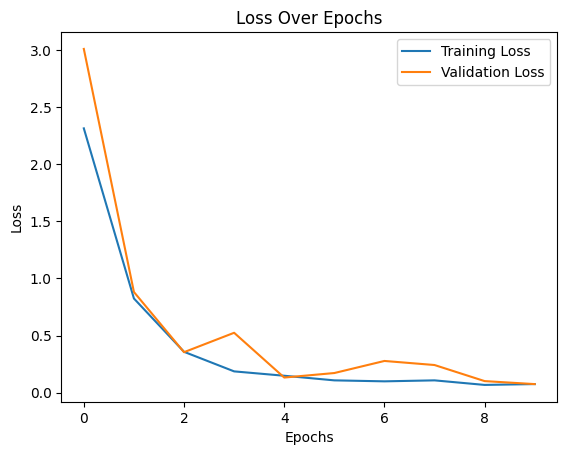

In [ ]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Testing model accuracy on Test data

In [ ]:
y_test = pd.read_csv('./content/Dataset/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

395/395 [==============================] - 111s 280ms/step
Accuracy: 93.80839271575614 %
      0      1      2      3      4      5      6      7      8      9   ...  \
0   56.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    2.0    0.0  ...   
1    0.0  707.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    2.0  730.0    5.0    0.0    5.0    0.0    0.0    0.0    0.0  ...   
3    0.0    1.0    0.0  443.0    0.0    4.0    0.0    0.0    0.0    0.0  ...   
4    0.0   10.0    0.0    0.0  643.0    2.0    0.0    0.0    0.0    0.0  ...   
5    0.0   10.0    1.0    6.0    1.0  608.0    1.0    0.0    0.0    0.0  ...   
6    0.0    0.0    0.0    0.0    0.0    0.0  128.0    0.0    0.0    0.0  ...   
7    0.0    0.0    0.0    0.0    0.0    0.0    0.0  445.0    5.0    0.0  ...   
8    0.0    0.0    0.0   21.0    1.0    3.0    0.0    0.0  420.0    0.0  ...   
9    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  451.0  ...   
10   0.0    0.0    0.0    0.0  

<Axes: >

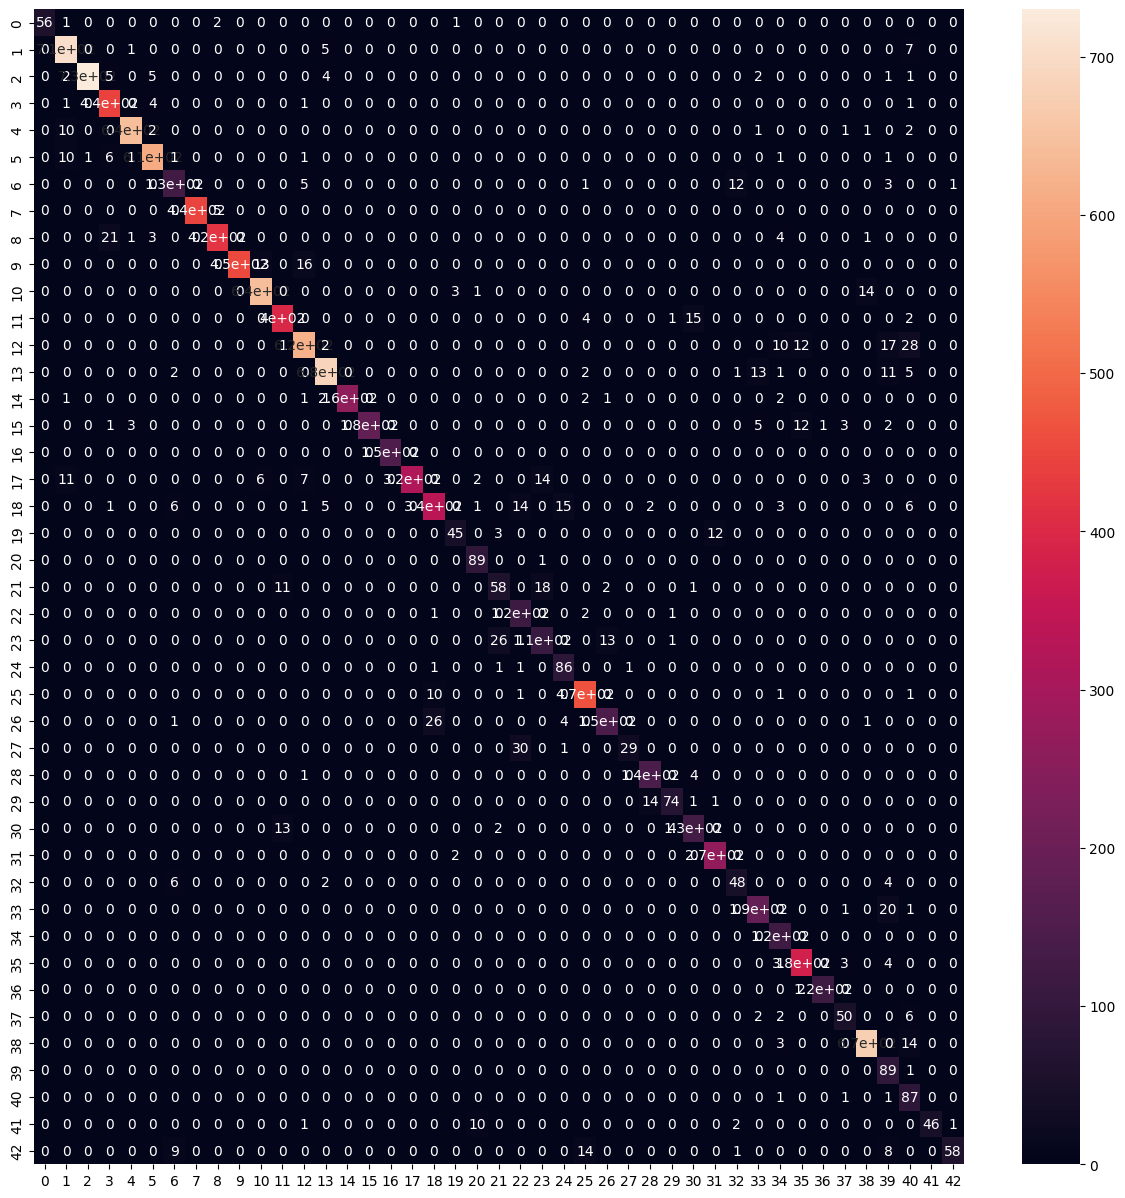

In [ ]:



#      Testing accuracy on Test Data
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('./content/Dataset/'+img)
        image = image.resize([50, 50])
        data.append(np.array(image))

X_test = np.array(data)
np.save('./content/X_test.npy', X_test)


with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)


np.save('pred.npy', pred)

print('Accuracy: ' + str(accuracy_score(labels, pred)*100) + ' %')

#       Confusion matrix & Heatmap
cm = confusion_matrix(labels, pred)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
cm = np.loadtxt("confusion_matrix.csv", delimiter=",")



df= pd.DataFrame(cm, index = classes,  columns = classes)
print(df)
plt.figure(figsize = (15,15))
sns.heatmap(df, annot=True)

In [ ]:
model.save("./resnet model/project.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




---



# CNN with custom model architecture on Augmented Images (Model 6)

### Example

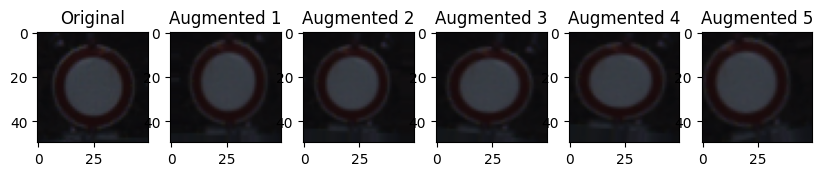

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np




datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

num_samples = 5
img_index = 0


original_img = x_train[img_index]
plt.figure(figsize=(10, 2))
plt.subplot(1, num_samples + 1, 1)
plt.imshow(original_img)
plt.title('Original')


for i in range(num_samples):
    augmented_img = datagen.random_transform(original_img)
    plt.subplot(1, num_samples + 1, i + 2)
    plt.imshow(augmented_img)
    plt.title(f'Augmented {i + 1}')

plt.show()


### Architecture

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(8, 8), activation='relu', input_shape=(50, 50, 3)))
model.add(Conv2D(filters=32, kernel_size=(8, 8), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))

model.add(Dropout(rate=0.5))

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(4, 4), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))

model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 43, 43, 16)        3088      
                                                                 
 conv2d_5 (Conv2D)           (None, 36, 36, 32)        32800     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 18, 18, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 18, 18, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)       

### Compile

In [ ]:

opt = Adam(learning_rate=0.001)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### Fitting  (with augmentation)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

batch_size = 32
epochs = 20
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))


Epoch 1/20
918/918 [==============================] - 589s 637ms/step - loss: 1.8375 - accuracy: 0.5022 - val_loss: 0.8202 - val_accuracy: 0.7285
Epoch 2/20
918/918 [==============================] - 561s 612ms/step - loss: 0.6811 - accuracy: 0.7793 - val_loss: 0.3186 - val_accuracy: 0.8872
Epoch 3/20
918/918 [==============================] - 573s 624ms/step - loss: 0.4732 - accuracy: 0.8440 - val_loss: 0.1416 - val_accuracy: 0.9517
Epoch 4/20
918/918 [==============================] - 563s 612ms/step - loss: 0.3563 - accuracy: 0.8838 - val_loss: 0.2068 - val_accuracy: 0.9339
Epoch 5/20
918/918 [==============================] - 574s 625ms/step - loss: 0.3194 - accuracy: 0.8942 - val_loss: 0.1063 - val_accuracy: 0.9636
Epoch 6/20
918/918 [==============================] - 575s 626ms/step - loss: 0.2736 - accuracy: 0.9105 - val_loss: 0.2475 - val_accuracy: 0.9188
Epoch 7/20
918/918 [==============================] - 576s 628ms/step - loss: 0.2585 - accuracy: 0.9140 - val_loss: 0.1003 -

### Evaluation

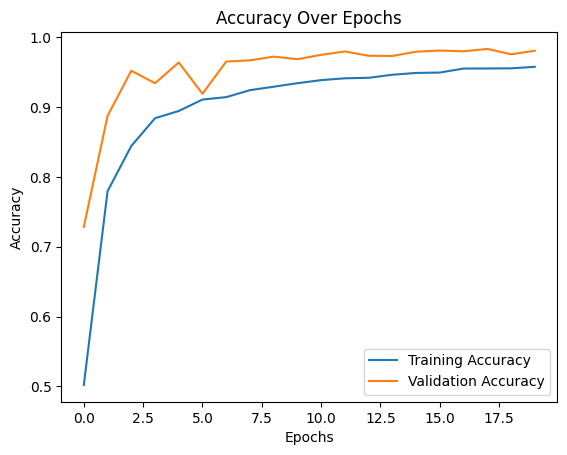

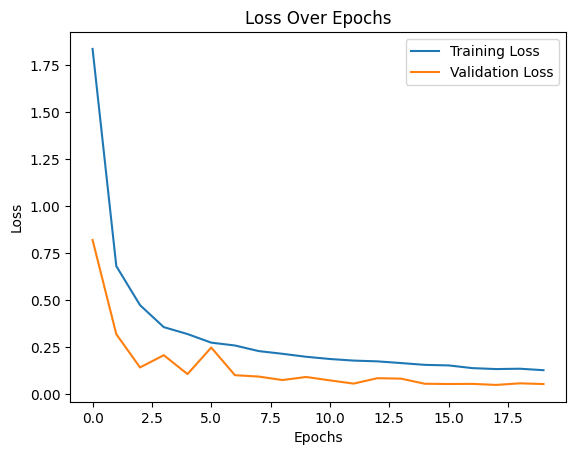

In [ ]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Testing accuracy on Test Data

In [ ]:
y_test = pd.read_csv('./content/Dataset/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

In [ ]:



#      Testing accuracy on Test Data
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('./content/Dataset/'+img)
        image = image.resize([50, 50])
        data.append(np.array(image))

X_test = np.array(data)
np.save('./content/X_test.npy', X_test)


with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)


np.save('pred.npy', pred)
pred = pred[:len(labels)]
print('Accuracy: ' + str(accuracy_score(labels, pred)*100) + ' %')



1974/1974 [==============================] - 202s 102ms/step
Accuracy: 94.77434679334917 %


### Saving

In [ ]:
model.save("./aug model/project.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




---



# **Model** **Demonstration**

### Loading model

In [ ]:
pred = np.load('./content/drive/MyDrive/aug model/pred.npy')

In [ ]:
X_test = np.load('./content/drive/MyDrive/custom model/X_test.npy')

In [ ]:
labels = np.load('./content/drive/MyDrive/aug model/labels.npy',allow_pickle=True)
imgs = np.load('./content/drive/MyDrive/aug model/imgs.npy',allow_pickle=True)

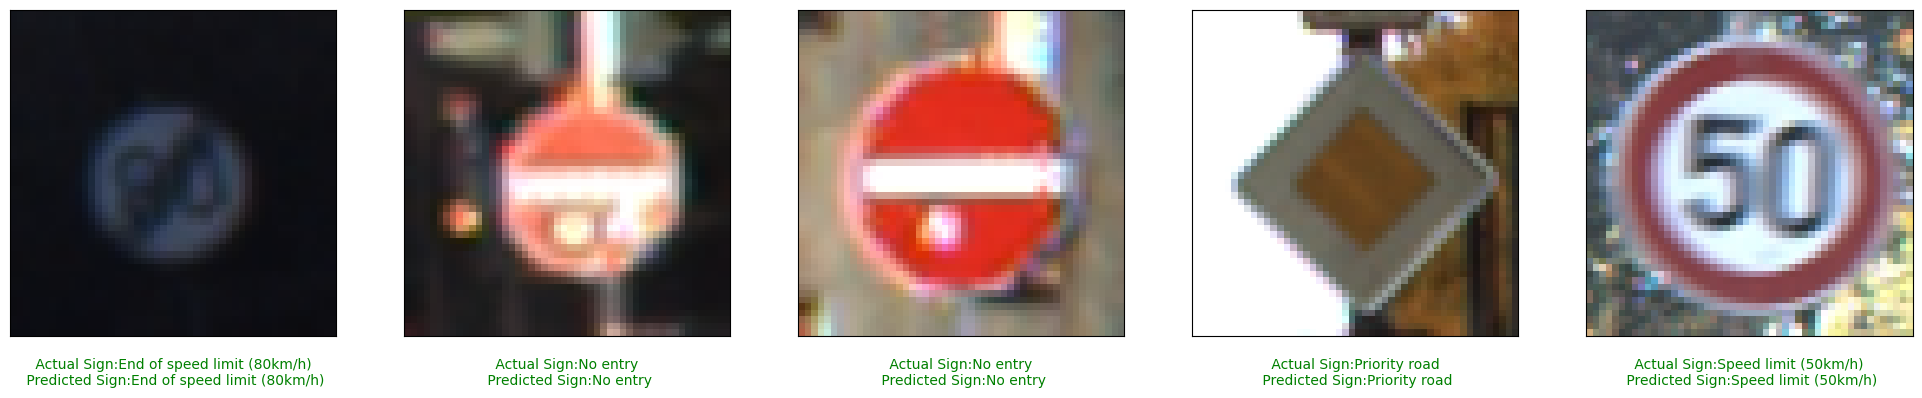

In [ ]:

model = load_model('./drive/MyDrive/aug model/project.h5')
plt.figure(figsize = (50, 50))

start_index = random.randint(0, 12360)
for i in range(5):
    start_index = random.randint(0, 12360)

    plt.subplot(10,10, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('\n Actual Sign:{} \n Predicted Sign:{}'.format(classes[actual],classes[prediction]), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

###Input image to classify

In [ ]:
from google.colab import files
from PIL import Image, ImageOps
def test_on_img():
    uploaded = files.upload()
    data = []
    for filename in uploaded.keys():
        image = Image.open(filename)

        image=rgb_image = image.convert("RGB")
        image = image.resize((50,50))

        data.append(np.array(image))

    x_test = np.array(data)
    y_pred = np.argmax(model.predict(x_test), axis=-1)

    return image, y_pred

pic, res = test_on_img()
pic = ImageOps.scale(pic, 4)  # Scale up the image by a factor of 2
pic.show()
print(res)
print()
print()
print("Sign={}".format(classes[res.item()]))

Saving 00400.png to 00400.png
1/1 [==============================] - 0s 285ms/step
[38]


Sign=Keep right


-----------------------------------------------

---

